In [1]:
import numpy as np
import cv2
import os
import matplotlib.pyplot as plt
from keras import Sequential
from sklearn.metrics import accuracy_score
from keras.preprocessing.image import ImageDataGenerator
from keras.utils.np_utils import to_categorical
from keras.layers import Conv2D, MaxPooling2D, Dropout, Dense, Activation
from keras.layers.core import Flatten
from keras.optimizers import Adam
from keras.datasets import mnist
import pandas as pd

In [2]:
%matplotlib inline

In [3]:
# Load train and test data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [4]:
# Number of classes
noOfClasses = 10

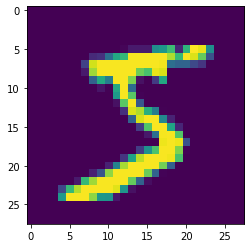

In [5]:
# Show image by index
index = 0
plt.imshow(X_train[index])

In [6]:
# Define function to preprocess image
def preProcessing(img):
    img = img / 255
    return img

In [7]:
# Preprocess all images
X_train = np.array(list(map(preProcessing, X_train)))
X_test = np.array(list(map(preProcessing, X_test)))

In [8]:
# Add depth of one
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2], 1)

In [9]:
# One hot encoding
y_train = to_categorical(y_train, noOfClasses)
y_test = to_categorical(y_test, noOfClasses)

In [10]:
# Create imageGenerator
dataGen = ImageDataGenerator(width_shift_range=0.1,
                            height_shift_range=0.1,
                            zoom_range=0.2,
                            shear_range=0.1,
                            rotation_range=10)

In [11]:
# fir imageGenerator
dataGen.fit(X_train)

In [12]:
# Image dimension
imageDimension = (28, 28, 1)

In [13]:
# Create model
def myModel():
    noOfFilters = 32
    sizeOfFilter1 = (5, 5)
    sizeOfFilter2 = (3, 3)
    sizeOfPoll = (2, 2)
    noOfNodes = 64
    
    model = Sequential()
    model.add(Conv2D(noOfFilters, sizeOfFilter1, padding='same',
                      input_shape = (imageDimension[0], imageDimension[1], 1)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size = sizeOfPoll))
    model.add(Conv2D(noOfFilters, sizeOfFilter2, padding='same'))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size = sizeOfPoll))
    model.add(Dropout(0.5))
    
    model.add(Flatten())
    
    model.add(Dense(noOfNodes, activation = "relu"))
    model.add(Dropout(0.5))
    model.add(Dense(noOfClasses, activation = "softmax"))
    
    model.compile(optimizer = Adam(learning_rate = 0.001), loss = "categorical_crossentropy", metrics = ['accuracy'])
    
    return model


In [14]:
# Get model
model = myModel()

In [15]:
# Fit model and save it
history = model.fit(dataGen.flow(X_train, y_train, batch_size=256), 
                              validation_data=(X_test, y_test),
                              epochs=10,
                              shuffle=1)

Epoch 1/10
235/235 [==============================] - 30s 128ms/step - loss: 0.9388 - accuracy: 0.6910 - val_loss: 0.1110 - val_accuracy: 0.9669
Epoch 2/10
235/235 [==============================] - 28s 120ms/step - loss: 0.4115 - accuracy: 0.8738 - val_loss: 0.0653 - val_accuracy: 0.9798
Epoch 3/10
235/235 [==============================] - 30s 127ms/step - loss: 0.3189 - accuracy: 0.9042 - val_loss: 0.0556 - val_accuracy: 0.9813
Epoch 4/10
235/235 [==============================] - 27s 113ms/step - loss: 0.2769 - accuracy: 0.9179 - val_loss: 0.0439 - val_accuracy: 0.9850
Epoch 5/10
235/235 [==============================] - 27s 114ms/step - loss: 0.2435 - accuracy: 0.9273 - val_loss: 0.0399 - val_accuracy: 0.9853
Epoch 6/10
235/235 [==============================] - 27s 115ms/step - loss: 0.2242 - accuracy: 0.9329 - val_loss: 0.0389 - val_accuracy: 0.9869
Epoch 7/10
235/235 [==============================] - 27s 114ms/step - loss: 0.2124 - accuracy: 0.9383 - val_loss: 0.0340 - val_ac

In [16]:
# model architecture
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        832       
_________________________________________________________________
activation (Activation)      (None, 28, 28, 32)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 32)        9248      
_________________________________________________________________
activation_1 (Activation)    (None, 14, 14, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
dropout (Dropout)            (None, 7, 7, 32)          0

In [19]:
# Score and accuracy on test set
score = model.evaluate(X_test, y_test, verbose=0)
score

[0.030430074781179428, 0.9896000027656555]

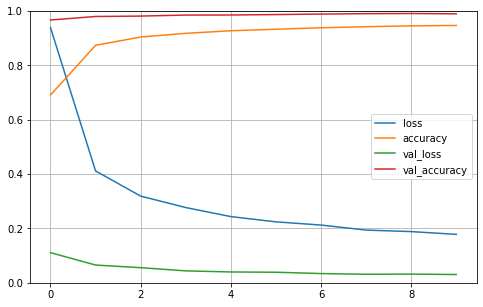

In [20]:
# Draw train and validation loss and accuracy
pd.DataFrame(history.history).plot(figsize = (8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [21]:
# Save model
model.save("model_2.h5")